<Figure size 432x288 with 0 Axes>

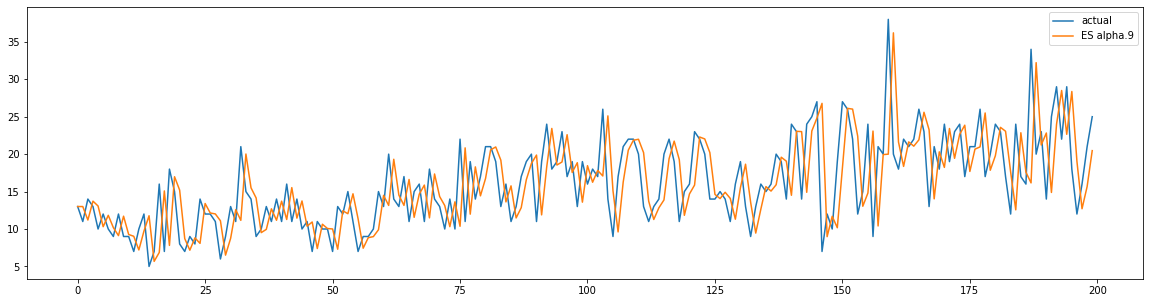

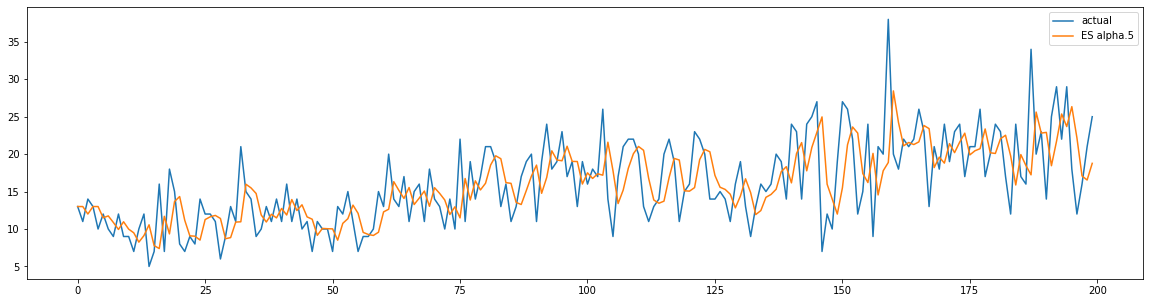

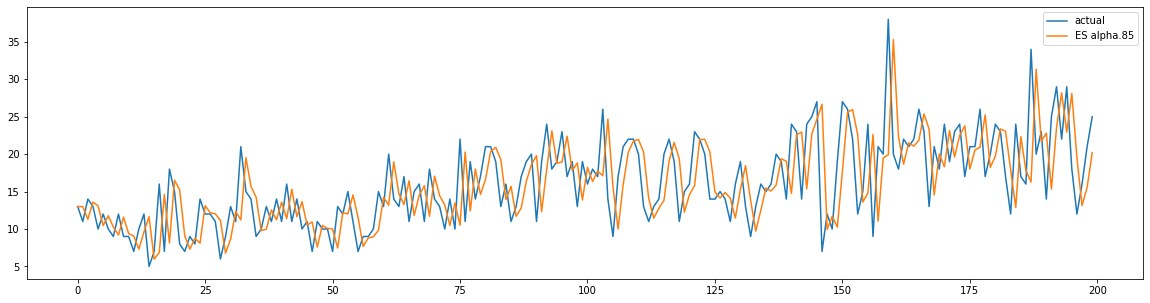

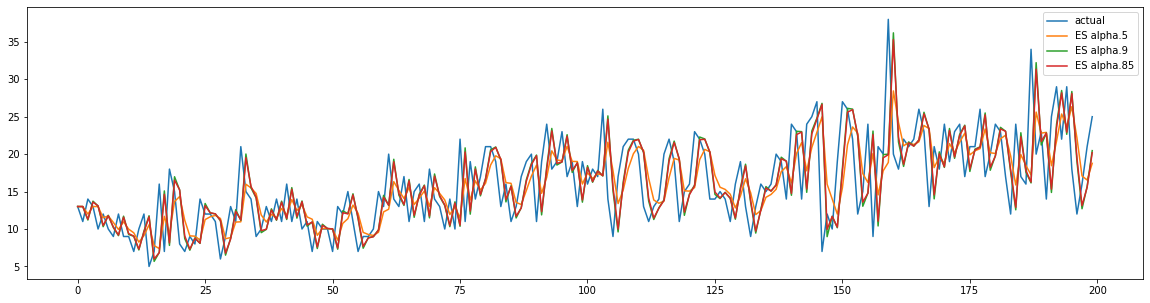

In [1]:
#Here we are using Expontential Smoothing to predict short-term sales in the 
#future. Exponential Smoothing looks at data taking into account an assigned 
#number of predicted periods to forecast. Alpha values also effect the accuarcy
#of the output; the higher the alpha, the more accuate the graph because there
#is more weight on the most recent values rather than the older points

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file):
  return pd.read_csv(file, sep = ",", header = None)

#Load data

data = load_data("sopranos1.csv")
data = data.values.flatten()

#define function to forecast all exponential smoothing values given an alpha

def ES(data,alpha):
  #Vector which keeps all of my predicitons for every period
  Yhat = np.zeros(len(data))
#manually predicting for 0
  Yhat[0]=data[0]
  #forloop to iterate on the periods
  for t in range (1, len(data)):
    Yhat[t]=alpha*data[t-1]+(1-alpha)*Yhat[t-1]
  return Yhat

#forecast all expontential smoothing values for alpha=0.5 and alpha=0.9

Yhat_alpha9=ES(data,0.9)
plt.figure(1)
#plot forecasts vs ground truth
fig,fig_ax=plt.subplots(figsize=(20,5))

#plotting the data: The higher the alpha-the more accurate the predicted values
#because there is more weight on the most recent data than the oldest values

fig_ax.plot(range(0, len(data)), data)
fig_ax.plot(range (0,len(data)),Yhat_alpha9)                    
fig_ax.legend(["actual", "ES alpha.9"])

Yhat_alpha5=ES(data, 0.5)
plt.figure(2)
fig,fig_ax=plt.subplots(figsize=(20,5))

fig_ax.plot(range(0, len(data)), data)
fig_ax.plot(range (0,len(data)),Yhat_alpha5)
fig_ax.legend(["actual", "ES alpha.5"])

Yhat_alpha85=ES(data, 0.85)
plt.figure(3)
fig,fig_ax=plt.subplots(figsize=(20,5))

fig_ax.plot(range(0, len(data)), data)
fig_ax.plot(range (0,len(data)),Yhat_alpha85)
fig_ax.legend(["actual", "ES alpha.85"])

Yhat_alpha5=ES(data, 0.5)
Yhat_alpha9=ES(data, 0.9)
Yhat_alpha85=ES(data,0.85)
plt.figure(3)
fig,fig_ax=plt.subplots(figsize=(20,5))

fig_ax.plot(range(0, len(data)), data)
fig_ax.plot(range (0,len(data)),Yhat_alpha5)  
fig_ax.plot(range (0,len(data)),Yhat_alpha9)  
fig_ax.plot(range (0,len(data)),Yhat_alpha85)
fig_ax.legend(["actual", "ES alpha.5","ES alpha.9","ES alpha.85"])

#Pros of ES
#More accurate than moving averages

#CONS
#produces forecasts that lag behind the actual trend
#Cannot handle trends and seasonal changes well